# Second project: Car Sales

### 1. First Inspection & Data Cleaning

In [1]:
# import all the libraries needed
import pandas as pd
import numpy as np # read numerial value or array
import matplotlib.pyplot as plt # create basic level of graph
import seaborn as sns # for graph

from scipy.stats import ttest_ind # for t-test
import scipy.stats as stats # confidence interval
from scipy.stats import f_oneway # ANOVA
from scipy.stats import chi2_contingency # Chi-square
import statsmodels.api as sm # regression
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import my data
path = "C:/Users/wangy/Downloads/sales/car_prices.csv"
car = pd.read_csv(path)

# get basic information
car.info()
car.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


We have a total of 16 columns. "vin" contains information on vehicel identification number but it can be useless for our analysis. The non-null value numbers in every column is different. We should also drop NAs.

In [3]:
# update the current "car" data frame.
car.drop('vin', axis=1, inplace=True)

# Drop all rows with NA values.
car.dropna(inplace = True)

# have a check
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   state         472325 non-null  object 
 7   condition     472325 non-null  float64
 8   odometer      472325 non-null  float64
 9   color         472325 non-null  object 
 10  interior      472325 non-null  object 
 11  seller        472325 non-null  object 
 12  mmr           472325 non-null  float64
 13  sellingprice  472325 non-null  float64
 14  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 57.7+ MB


Okay! Now we have a total of 15 columns and 472325 values.

### 2. Descriptive Statistics

In [65]:
# statistical report
car.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


#### Most popular

In [19]:
# how many unique car brands
car['make'].nunique()

53

Too many values. Show only the top 10.

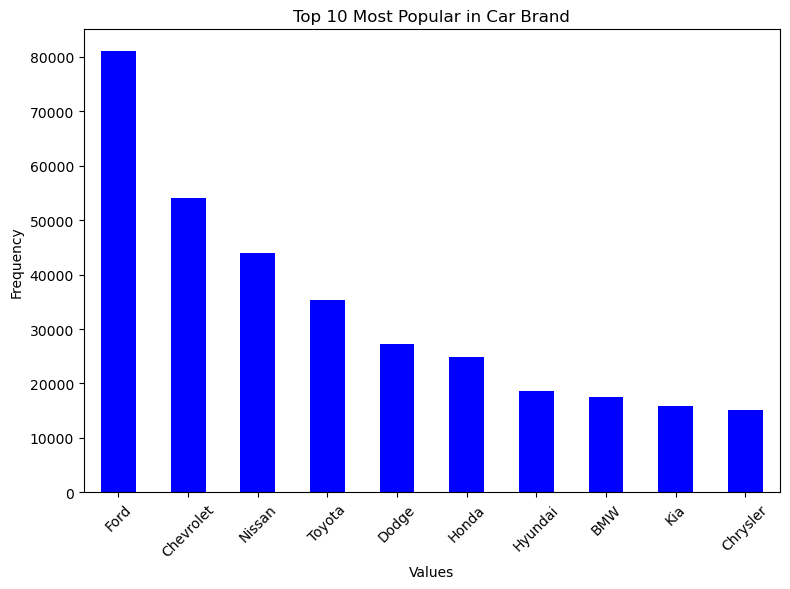

In [28]:
# only select the top 10
top_10_values = car['make'].value_counts().head(10)

# Create a bar plot
top_10_values.plot(kind='bar', color='blue', figsize=(8,6))

# Add labels and title
plt.title('Top 10 Most Popular in Car Brand')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
# how many unique model
car['model'].nunique()

768

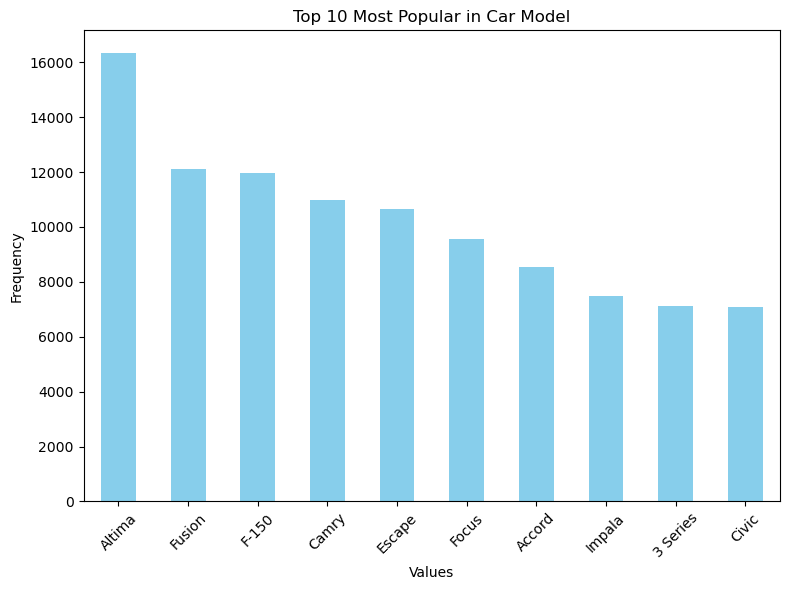

In [30]:
top_10_values = car['model'].value_counts().head(10)

# Create a bar plot
top_10_values.plot(kind='bar', color='skyblue', figsize=(8,6))

# Add labels and title
plt.title('Top 10 Most Popular in Car Model')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.tight_layout()

# Show the plot
plt.show()

In [40]:
# body
car['body'].nunique()

85

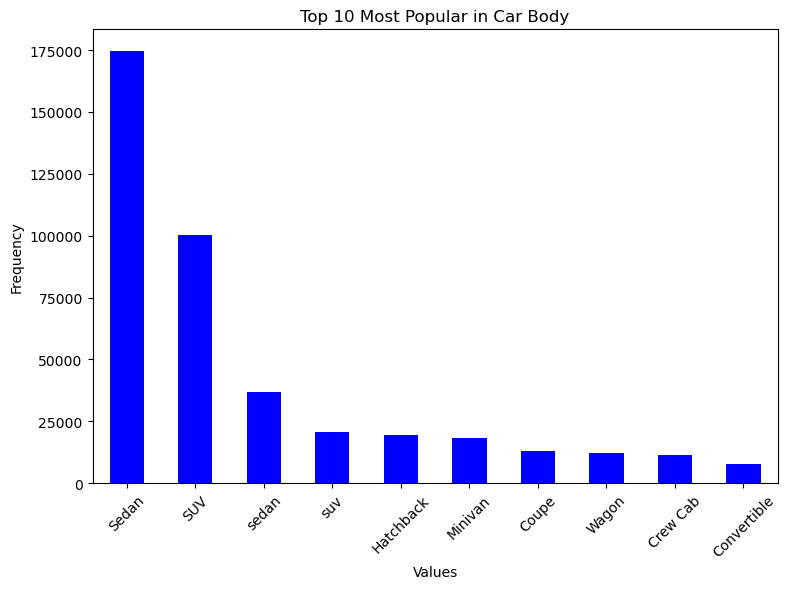

In [41]:
# only select the top 10
top_10_values = car['body'].value_counts().head(10)

# Create a bar plot
top_10_values.plot(kind='bar', color='blue', figsize=(8,6))

# Add labels and title
plt.title('Top 10 Most Popular in Car Body')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [42]:
# transmission
car['transmission'].nunique()

2

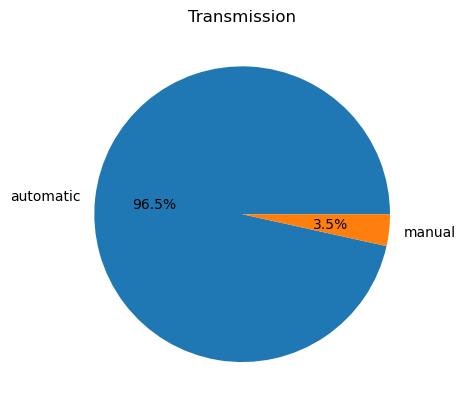

In [43]:
# transmission pie chart
car.transmission.value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.title("Transmission")
# Remove the y-axis label
plt.ylabel('')
plt.show()

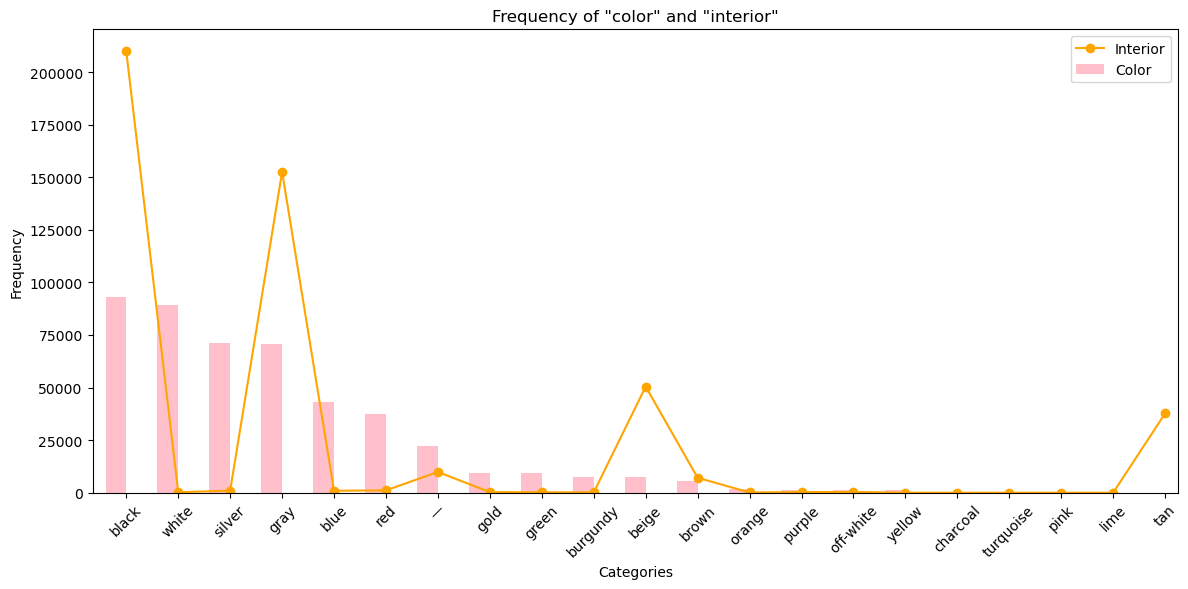

In [44]:
# Get unique values from both columns
all_values = sorted(set(car['color'].unique()).union(set(car['interior'].unique())))

# Count frequencies for each column
color_counts = car['color'].value_counts().reindex(all_values, fill_value=0)
interior_counts = car['interior'].value_counts().reindex(all_values, fill_value=0)

# Sort color_counts to order bars by frequency
color_counts_sorted = color_counts.sort_values(ascending=False)

# Reorder interior_counts to match the sorted color_counts
interior_counts_sorted = interior_counts.loc[color_counts_sorted.index]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for 'color'
color_counts_sorted.plot(kind='bar', ax=ax, color='pink', width=0.4, position=1, label='Color')

# Dot plot with line for 'interior'
ax.plot(interior_counts_sorted.index, interior_counts_sorted, marker='o', linestyle='-', color='orange', label='Interior')

# Add labels and title
ax.set_title('Frequency of "color" and "interior"')
ax.set_xlabel('Categories')
ax.set_ylabel('Frequency')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

plt.show()

Black is the most popular color both for the car appearance and the interior. For the appearance, black, white and silver are the top three colors. For the interior, black, gray and beige are the top three colors.

### 3. Analysis

#### Trends over time

In [49]:
# Convert the column to datetime format
car['new_saledate'] = pd.to_datetime(car['saledate'], errors='coerce')

# I only want the top 10 in "make"
top_makes = car['make'].value_counts().head(10).index

# Filter data to include only the top 10 makes
new_car = car[car['make'].isin(top_makes)]

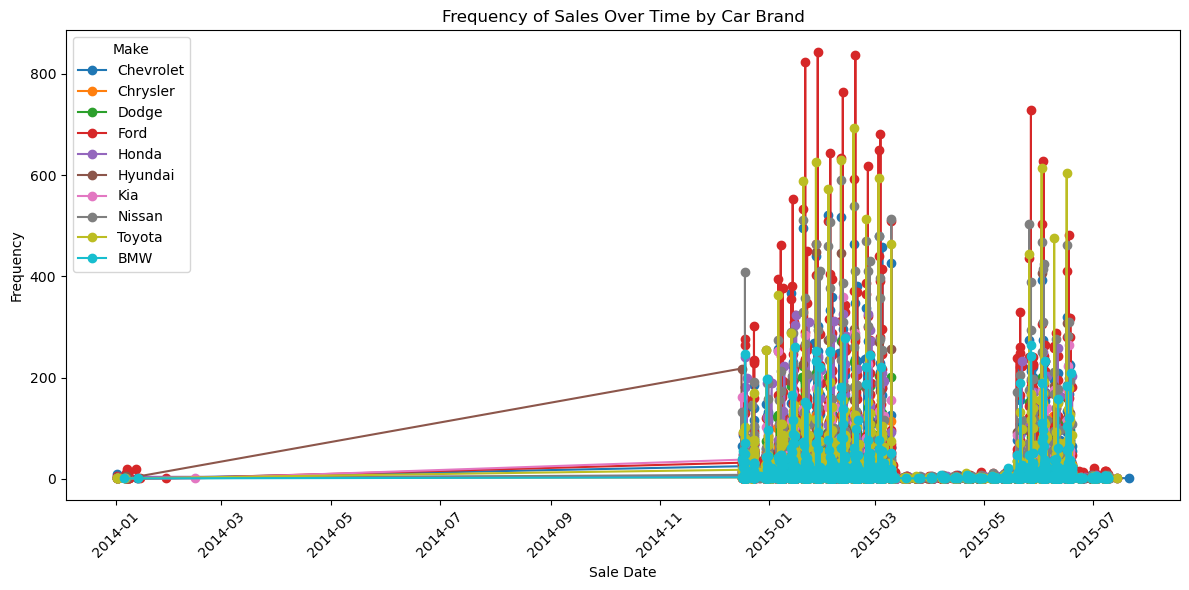

In [51]:
# Group by 'new_saledate' and 'make', then count occurrences
grouped = new_car.groupby(['new_saledate', 'make']).size().reset_index(name='frequency')

# Create a line plot
plt.figure(figsize=(12, 6))

# Plot each 'make' with a different color
for make in grouped['make'].unique():
    subset = grouped[grouped['make'] == make]
    plt.plot(subset['new_saledate'], subset['frequency'], marker='o', label=make)

# Add labels and title
plt.title('Frequency of Sales Over Time by Car Brand')
plt.xlabel('Sale Date')
plt.ylabel('Frequency')
plt.legend(title='Make')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to avoid overlap

plt.show()

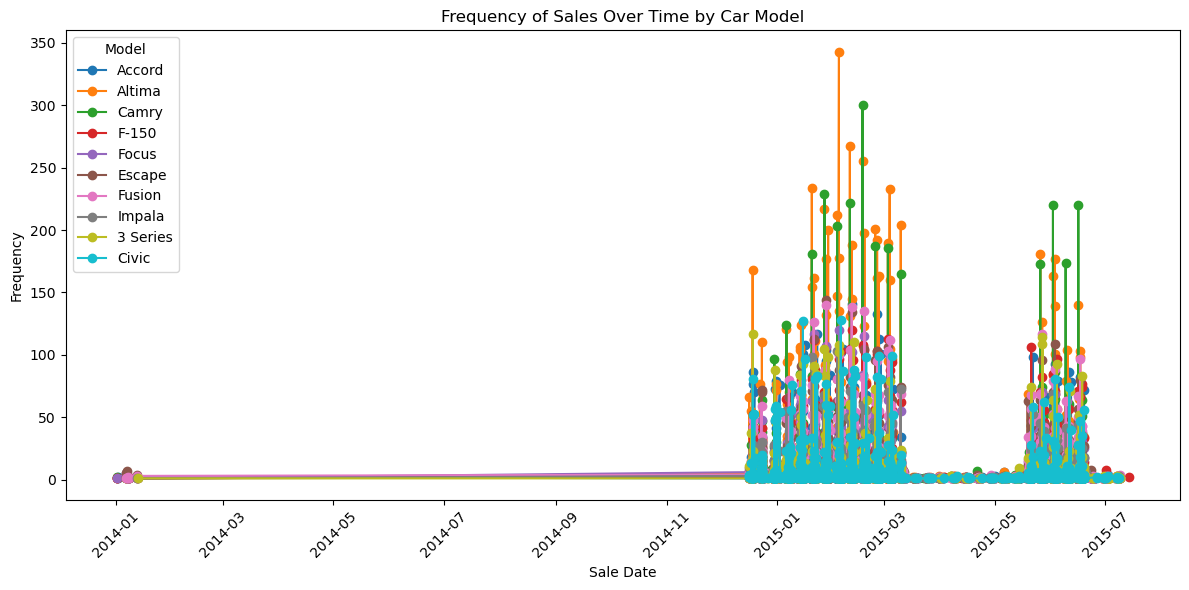

In [59]:
# model

# Get the top 10 models
top_models = car['model'].value_counts().head(10).index

# Filter data
new_car = car[car['model'].isin(top_models)]

# Group by 'new_saledate' and 'model', then count occurrences
grouped = new_car.groupby(['new_saledate', 'model']).size().reset_index(name='frequency')

# Create a line plot
plt.figure(figsize=(12, 6))

# Plot each 'model' with a different color
for model in grouped['model'].unique():
    subset = grouped[grouped['model'] == model]
    plt.plot(subset['new_saledate'], subset['frequency'], marker='o', label=model)

# Add labels and title
plt.title('Frequency of Sales Over Time by Car Model')
plt.xlabel('Sale Date')
plt.ylabel('Frequency')
plt.legend(title='Model')
plt.xticks(rotation=45) 
plt.tight_layout() 

plt.show()

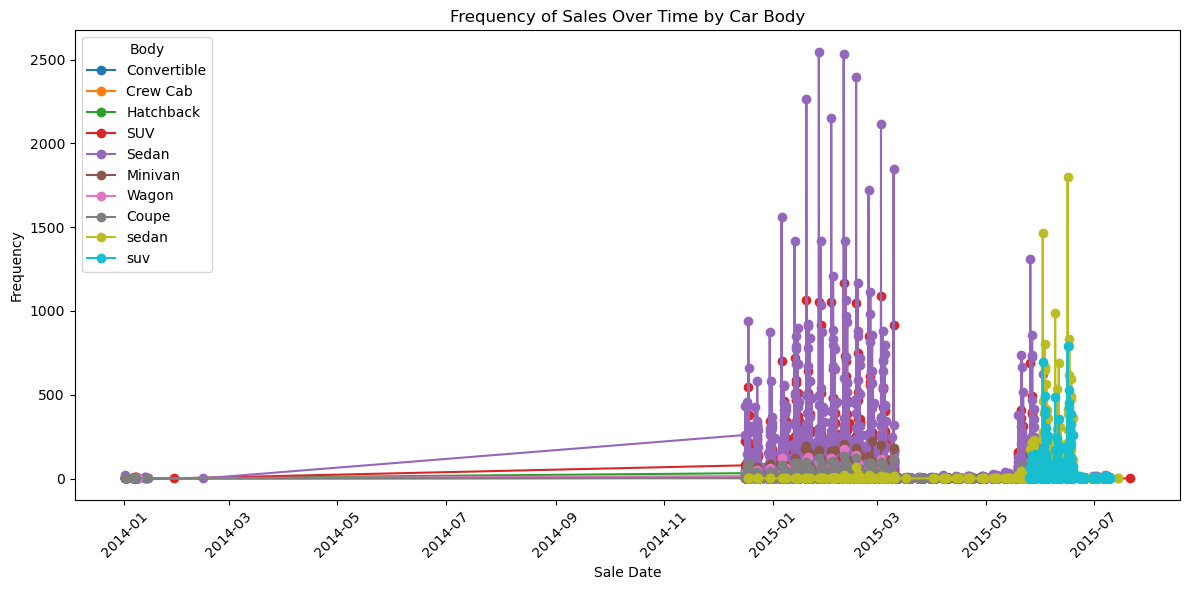

In [61]:
# body

# Get the top 10 bodys
top_bodys = car['body'].value_counts().head(10).index

# Filter data
new_car = car[car['body'].isin(top_bodys)]

# Group by 'new_saledate' and 'body', then count occurrences
grouped = new_car.groupby(['new_saledate', 'body']).size().reset_index(name='frequency')

# Create a line plot
plt.figure(figsize=(12, 6))

# Plot each 'body' with a different color
for body in grouped['body'].unique():
    subset = grouped[grouped['body'] == body]
    plt.plot(subset['new_saledate'], subset['frequency'], marker='o', label=body)

# Add labels and title
plt.title('Frequency of Sales Over Time by Car Body')
plt.xlabel('Sale Date')
plt.ylabel('Frequency')
plt.legend(title='Body')
plt.xticks(rotation=45) 
plt.tight_layout() 

plt.show()

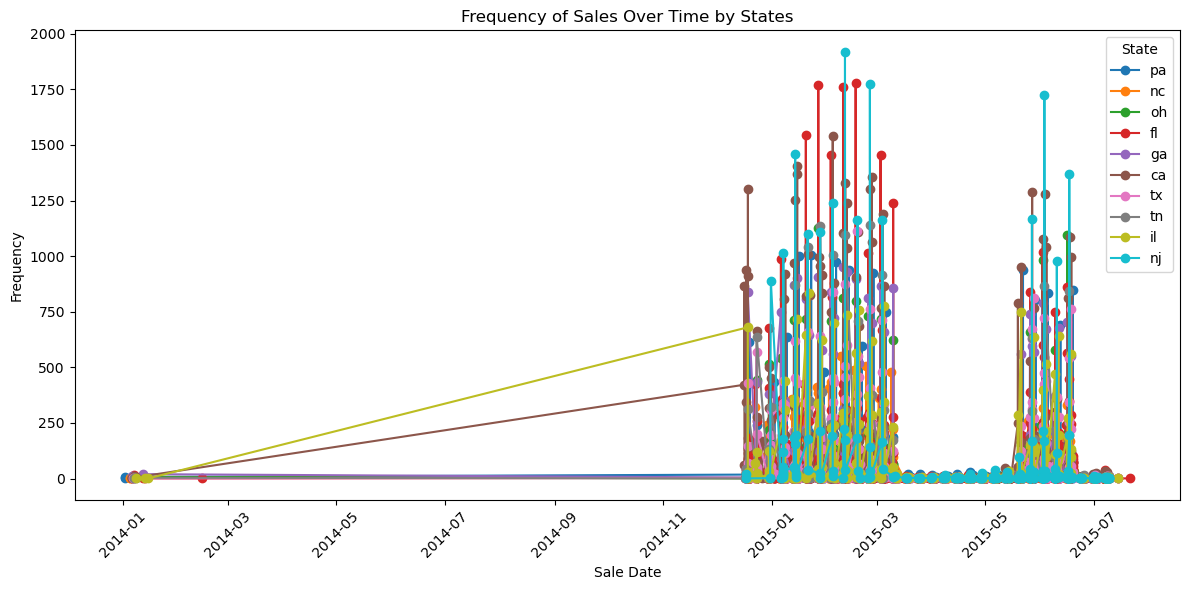

In [64]:
# State

# Get the top 10 states
top_states = car['state'].value_counts().head(10).index

# Filter data
new_car = car[car['state'].isin(top_states)]

# Group by 'new_saledate' and 'state', then count occurrences
grouped = new_car.groupby(['new_saledate', 'state']).size().reset_index(name='frequency')

# Create a line plot
plt.figure(figsize=(12, 6))

# Plot each 'state' with a different color
for state in grouped['state'].unique():
    subset = grouped[grouped['state'] == state]
    plt.plot(subset['new_saledate'], subset['frequency'], marker='o', label=state)

# Add labels and title
plt.title('Frequency of Sales Over Time by States')
plt.xlabel('Sale Date')
plt.ylabel('Frequency')
plt.legend(title='State')
plt.xticks(rotation=45) 
plt.tight_layout() 

plt.show()

#### The impact of vehicle condition and mileage on selling prices

In [69]:
# linear regression
X = car[['condition', 'odometer']]
y = car['sellingprice']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                 1.294e+05
Date:                Wed, 11 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:38:05   Log-Likelihood:            -4.8986e+06
No. Observations:              472325   AIC:                         9.797e+06
Df Residuals:                  472322   BIC:                         9.797e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.687e+04     37.042    455.300      0.0

The higher the condition rating and the less distance a vehicle has traveled, the higher the actual selling prices.

#### The relationship between MMR values and actual selling prices

In [70]:
correlation = car['mmr'].corr(car['sellingprice'])
print(f"Correlation coefficient between MMR and actual selling prices: {correlation}")

Correlation coefficient between MMR and actual selling prices: 0.9834931745325886


In [71]:
# linear regression
X = car[['mmr']]
y = car['sellingprice']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.395e+07
Date:                Wed, 11 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:40:51   Log-Likelihood:            -4.1944e+06
No. Observations:              472325   AIC:                         8.389e+06
Df Residuals:                  472323   BIC:                         8.389e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.5012      4.461     -7.509      0.0

The higher the market value estimates, the higher the actual selling prices.